# PANDAS
Bài tập giúp anh/chị làm quen với cách sử dụng pandas

## BƯỚC 1: IMPORT THƯ VIỆN

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os #Thu vien ho tro thao tac he dieu hanh

## BƯỚC 2: IMPORT DỮ LIỆU
Cần quan tâm đến kiểu file dữ liệu

- `*.csv`: pd.read_csv()

- `*.xlsx` hoặc `*.xls`: pd.read_excel()

- `sql database`: pd.read_sql(sql, con = ...)

**Lưu ý** : Luôn phải kiểm tra đường dẫn của folder hiện tại

In [60]:
# Kiểm tra đường dẫn hiện tại của file
os.getcwd()

'd:\\2.MINDX\\NEWTC\\Lesson 03\\Tài liệu thực hành'

In [61]:
# Kết hợp đường dẫn hiện tại với tên file dữ liệu
"""
Lưu ý: Kiểm tra đường dẫn hiện tại của folder nhằm xác định chính xác vị trí.
Sau đó điều chỉnh đường dẫn tới file dữ liệu sao cho phù hợp
Ví dụ:
 Cây thư mục hiện tại: D:/2.MINDX/NEWTC/Lesson 03/Tài liệu thực hành
    File dữ liệu: D:/2.MINDX/NEWTC/Dataset/Bài tập về nhà/all_players_stats.csv
-> Đường dẫn tương đối tới file dữ liệu: /Dataset/Bài tập về nhà/all_players_stats.csv
"""
df_player = pd.read_csv(
    "Dataset/Bài tập về nhà/all_players_stats.csv"  # Học viên điều chỉnh lại đường dẫn cho phù hợp
)
df_player.head()

,Team,JerseyNo,Player,Position,Appearances,Substitutions,Goals,Penalties,YellowCards,RedCards
0,Arsenal,7,Bukayo Saka,Defender/Midfielder,40,3,12,2,6.0,0.0
1,Arsenal,6,Gabriel,Defender,37,1,5,0,7.0,1.0
2,Arsenal,32,Aaron Ramsdale,Goalkeeper,37,0,0,0,1.0,0.0
3,Arsenal,4,Ben White,Defender,37,0,0,0,3.0,0.0
4,Arsenal,8,Martin Odegaard,Midfielder,36,4,7,0,4.0,0.0


## Bước 3: Đọc các thông tin tổng quan, phát hiện vấn đề về dữ liệu

In [48]:
#Thông tin tổng quan về dữ liệu
df_player.info()

<class 'pandas.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Team           623 non-null    str    
 1   JerseyNo       623 non-null    int64  
 2   Player         623 non-null    str    
 3   Position       623 non-null    str    
 4   Apearances     623 non-null    int64  
 5   Substitutions  623 non-null    int64  
 6   Goals          623 non-null    int64  
 7   Penalties      623 non-null    int64  
 8   YellowCards    623 non-null    float64
 9   RedCards       623 non-null    float64
dtypes: float64(2), int64(5), str(3)
memory usage: 48.8 KB


In [51]:
#Kiểm tra thống kê cơ bản của dữ liệu
# Lưu ý: Chỉ áp dụng cho các cột số
df_player.describe()

,JerseyNo,Apearances,Substitutions,Goals,Penalties,YellowCards,RedCards
count,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,22.597111,16.861958,4.630819,2.245586,0.168539,2.457464,0.086677
std,18.719450,13.950425,4.950411,4.072776,0.787057,2.694708,0.303568
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,18.000000,16.000000,3.000000,1.000000,0.000000,2.000000,0.000000
75%,30.000000,27.500000,7.000000,3.000000,0.000000,4.000000,0.000000
max,97.000000,54.000000,25.000000,31.000000,9.000000,12.000000,2.000000


In [49]:
#Kiểm tra null value trong dữ liệu
df_player.isnull().sum()

Team             0
JerseyNo         0
Player           0
Position         0
Apearances       0
Substitutions    0
Goals            0
Penalties        0
YellowCards      0
RedCards         0
dtype: int64

In [50]:
#Kiểm tra trùng lặp trong dữ liệu
df_player.duplicated().sum()

np.int64(0)

## BƯỚC 4: XỬ LÝ DỮ LIỆU VỚI PANDAS

### Câu 1: Sắp xếp dữ liệu

Sử dụng câu lệnh sort_value()

In [55]:
# Sắp xếp dữ liệu theo số bàn thắng giảm dần và lấy 10 dòng đầu tiên
top_10_scorers = df_player.sort_values(by="Goals", ascending=False).head(10)
top_10_scorers

,Team,JerseyNo,Player,Position,Apearances,Substitutions,Goals,Penalties,YellowCards,RedCards
341,Liverpool,11,Mohamed Salah,Midfielder/Forward,44,6,31,6,1.0,0.0
514,Tottenham Hotspur,10,Harry Kane,Forward,47,3,27,4,5.0,0.0
367,Manchester City,26,Riyad Mahrez,Midfielder/Forward,31,16,24,7,1.0,0.0
511,Tottenham Hotspur,7,SON Heung-min,Midfielder/Forward,39,6,24,0,3.0,0.0
407,Manchester United,7,Cristiano Ronaldo,Midfielder/Forward,35,3,24,3,9.0,0.0
331,Liverpool,10,Sadio Mané,Midfielder/Forward,45,5,23,0,8.0,0.0
317,Liverpool,20,Diogo Jota,Midfielder/Forward,39,15,21,0,6.0,0.0
351,Manchester City,17,Kevin De Bruyne,Midfielder/Forward,39,6,19,1,4.0,0.0
296,Leicester City,10,James Maddison,Midfielder,40,13,18,0,7.0,0.0
572,West Ham United,20,Jarrod Bowen,Midfielder/Forward,45,6,18,0,8.0,0.0


In [ ]:
# Sắp xếp dữ liệu theo số bàn thắng tăng dần và lấy 10 dòng đầu tiên
bottom_10_scorers = df_player.sort_values(by="Goals", ascending=True).head(10)
bottom_10_scorers

In [ ]:
# Sắp xếp dữ liệu theo độ ưu tiên: Số bàn thắng (Goals) giảm dần, và Appearances tăng dần
df_player.sort_values(by=["Goals", "Appearances"], ascending=[False, True])

,Team,JerseyNo,Player,Position,Apearances,Substitutions,Goals,Penalties,YellowCards,RedCards
341,Liverpool,11,Mohamed Salah,Midfielder/Forward,44,6,31,6,1.0,0.0
514,Tottenham Hotspur,10,Harry Kane,Forward,47,3,27,4,5.0,0.0
367,Manchester City,26,Riyad Mahrez,Midfielder/Forward,31,16,24,7,1.0,0.0
407,Manchester United,7,Cristiano Ronaldo,Midfielder/Forward,35,3,24,3,9.0,0.0
511,Tottenham Hotspur,7,SON Heung-min,Midfielder/Forward,39,6,24,0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...
384,Manchester United,1,David De Gea,Goalkeeper,46,0,0,0,0.0,0.0
175,Chelsea,16,Edouard Mendy,Goalkeeper,49,0,0,0,3.0,0.0
353,Manchester City,31,Ederson,Goalkeeper,49,0,0,0,4.0,0.0
303,Leicester City,1,Kasper Schmeichel,Goalkeeper,53,0,0,0,1.0,0.0


### Câu 2: Lọc dữ liệu

In [ ]:
# Tìm ra cầu thủ có số thẻ vàng nhiều nhất
most_yellow_cards = df_player.loc[df_player["YellowCards"] == df_player["YellowCards"].max()]
most_yellow_cards

,Team,JerseyNo,Player,Position,Appearances,Substitutions,Goals,Penalties,YellowCards,RedCards
149,Burnley,5,James Tarkowski,Defender,37,0,1,0,12.0,0.0
178,Chelsea,2,Antonio Rüdiger,Defender,54,0,5,0,12.0,0.0
197,Crystal Palace,23,Conor Gallagher,Midfielder,37,2,8,0,12.0,0.0


In [67]:
# Tìm ra Cầu thủ có số thẻ đỏ nhiều nhất
most_red_cards = df_player.loc[df_player["RedCards"] == df_player["RedCards"].max()]
most_red_cards

,Team,JerseyNo,Player,Position,Appearances,Substitutions,Goals,Penalties,YellowCards,RedCards
5,Arsenal,34,Granit Xhaka,Defender/Midfielder,29,1,1,0,10.0,2.0
45,Aston Villa,4,Ezri Konsa,Defender/Midfielder,30,1,2,0,4.0,2.0
575,West Ham United,3,Aaron Cresswell,Defender,41,1,2,0,4.0,2.0
608,Wolverhampton Wanderers,9,Raúl Jiménez,Forward,30,6,6,1,5.0,2.0


In [70]:
# Tìm ra cầu thủ vừa có thẻ vàng nhiều nhất và ra trận nhiều nhất
most_yellow_and_appearances = df_player.loc[
    (df_player["YellowCards"] == df_player["YellowCards"].max())
    & (df_player["Appearances"] == df_player["Appearances"].max())
]
most_yellow_and_appearances

,Team,JerseyNo,Player,Position,Appearances,Substitutions,Goals,Penalties,YellowCards,RedCards
178,Chelsea,2,Antonio Rüdiger,Defender,54,0,5,0,12.0,0.0


In [71]:
# Tìm ra cầu thủ chơi ở vị trí Defender và có số bàn thắng nhiều nhất
defender_top_scorer = df_player.loc[
    (df_player["Position"].str.contains("Defender")) &
    (df_player["Goals"] == df_player.loc[df_player["Position"].str.contains("Defender"), "Goals"].max())
]   
defender_top_scorer

,Team,JerseyNo,Player,Position,Appearances,Substitutions,Goals,Penalties,YellowCards,RedCards
0,Arsenal,7,Bukayo Saka,Defender/Midfielder,40,3,12,2,6.0,0.0


### Câu 3: hãy tìm ra cầu thủ thi đấu nhiều nhất với từng CLB

Gợi ý: Sử dụng group by và merge

In [72]:
# Hãy tìm ra cầu thủ thi đấu nhiều nhất của từng CLB

# Bước 1: Tìm số trận đấu nhiều nhất của từng CLB
max_appearances_per_team = df_player.groupby("Team")["Appearances"].max().reset_index()
max_appearances_per_team

,Team,Appearances
0,Arsenal,40
1,Aston Villa,40
2,Brentford,39
3,Brighton and Hove Albion,38
4,Burnley,39
5,Chelsea,54
6,Crystal Palace,42
7,Everton,37
8,Leeds United,42
9,Leicester City,53


In [73]:
# Bước 2: Kết hợp với bảng dữ liệu gốc để lấy thông tin cầu thủ tương ứng
top_players_per_team = pd.merge(
    max_appearances_per_team,
    df_player,
    on=["Team", "Appearances"],
    how="left"
)
top_players_per_team

,Team,Appearances,JerseyNo,Player,Position,Substitutions,Goals,Penalties,YellowCards,RedCards
0,Arsenal,40,7,Bukayo Saka,Defender/Midfielder,3,12,2,6.0,0.0
1,Aston Villa,40,2,Matty Cash,Defender/Midfielder,0,4,0,8.0,0.0
2,Brentford,39,18,Pontus Jansson,Defender,0,3,0,7.0,0.0
3,Brighton and Hove Albion,38,1,Robert Sánchez,Goalkeeper,0,0,0,3.0,1.0
4,Burnley,39,1,Nick Pope,Goalkeeper,0,0,0,1.0,0.0
5,Chelsea,54,2,Antonio Rüdiger,Defender,0,5,0,12.0,0.0
6,Crystal Palace,42,6,Marc Guehi,Defender,0,4,0,4.0,0.0
7,Everton,37,1,Jordan Pickford,Goalkeeper,0,0,0,2.0,0.0
8,Leeds United,42,1,Illan Meslier,Goalkeeper,0,0,0,2.0,0.0
9,Leicester City,53,1,Kasper Schmeichel,Goalkeeper,0,0,0,1.0,0.0


# EDA DATA

Bài tập giúp anh/chị làm quen với quá trình xử lý dữ liệu với Python

## Bước 1: Import thư viện

In [13]:
import pandas as pd #Thu vien xu ly du lieu
import numpy as np #Thu vien tinh toan so hoc
import seaborn as sns #Thu vien ve do hoa
import matplotlib.pyplot as plt #Thu vien ve do hoa
import os #Thu vien ho tro thao tac he dieu hanh

## Bước 2: Import dữ liệu

Cần quan tâm đến kiểu file dữ liệu

- `*.csv`: pd.read_csv()

- `*.xlsx` hoặc `*.xls`: pd.read_excel()

- `sql database`: pd.read_sql(sql, con = ...)

In [14]:
#Kiểm tra đường dẫn hiện tại của file 
os.getcwd()

'd:\\2.MINDX\\NEWTC\\Lesson 03\\Tài liệu thực hành'

In [15]:
# Kết hợp đường dẫn hiện tại với tên file dữ liệu
''' 
Lưu ý: Kiểm tra đường dẫn hiện tại của folder nhằm xác định chính xác vị trí. 
Sau đó điều chỉnh đường dẫn tới file dữ liệu sao cho phù hợp 
Ví dụ: 
 Cây thư mục hiện tại: D:/2.MINDX/NEWTC/Lesson 03/Tài liệu thực hành
    File dữ liệu: D:/2.MINDX/NEWTC/Dataset/Bài tập về nhà/brasil-real-estate-1.csv
-> Đường dẫn tương đối tới file dữ liệu: /Dataset/Bài tập về nhà/brasil-real-estate-1.csv
'''
df = pd.read_csv(
    "Dataset/Bài tập về nhà/brasil-real-estate-1.csv" #Học viên điều chỉnh lại đường dẫn cho phù hợp
)
df.head()

,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110.0,"$187,230.85"
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65.0,"$81,133.37"
2,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211.0,"$154,465.45"
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99.0,"$146,013.20"
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55.0,"$101,416.71"


## Bước 3: Đọc các thông tin tổng quan, phát hiện vấn đề về dữ liệu

In [16]:
# Đọc thông tin tổng quan
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 12834 entries, 0 to 12833
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            12834 non-null  str    
 1   place_with_parent_names  12834 non-null  str    
 2   region                   12834 non-null  str    
 3   lat-lon                  11551 non-null  str    
 4   area_m2                  12834 non-null  float64
 5   price_usd                12834 non-null  str    
dtypes: float64(1), str(5)
memory usage: 601.7 KB


In [17]:
# Kiểm tra kiểu dữ liệu
df.dtypes

property_type                  str
place_with_parent_names        str
region                         str
lat-lon                        str
area_m2                    float64
price_usd                      str
dtype: object

In [18]:
# Kiểm tra số lượng dòng , cột
df.shape

(12834, 6)

In [19]:
# Kiểm tra dữ liệu trùng lặp
df.duplicated().sum()

np.int64(834)

In [20]:
# Hiển thị những dòng dữ liệu bị duplicate

#1. chỉ bản copy, giữ lại bản đầu
dupes = df[df.duplicated()]
dupes

#2. show tất cả bản trùng (cả bản đầu + bản sau)
dupes_all = df[df.duplicated(keep=False)]
dupes_all

,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd
34,house,|Brasil|Bahia|Lauro de Freitas|Pitangueiras|,Northeast,"-12.852844,-38.32711",202.0,"$154,465.45"
36,house,|Brasil|Bahia|Lauro de Freitas|Pitangueiras|,Northeast,"-12.852844,-38.32711",202.0,"$154,465.45"
39,house,|Brasil|Bahia|Lauro de Freitas|Pitangueiras|,Northeast,"-12.852844,-38.32711",202.0,"$154,465.45"
131,apartment,|Brasil|Bahia|Salvador|Costa Azul|,Northeast,"-12.992462,-38.444553",115.0,"$115,459.02"
157,apartment,|Brasil|Bahia|Salvador|Costa Azul|,Northeast,"-12.992462,-38.444553",115.0,"$115,459.02"
...,...,...,...,...,...,...
12683,apartment,|Brasil|Pará|Belém|Sacramenta|,North,"-1.418348,-48.479977",79.0,"$115,418.77"
12684,apartment,|Brasil|Pará|Belém|Sacramenta|,North,"-1.418348,-48.479977",65.0,"$90,344.81"
12688,apartment,|Brasil|Pará|Belém|Umarizal|,North,"-1.441757,-48.473316",56.0,"$141,221.99"
12720,apartment,|Brasil|Pará|Belém|Batista Campos|,North,"-1.456723,-48.487934",118.0,"$202,833.42"


In [21]:
# Kiểm tra dữ liệu null
df.isna().sum()

property_type                 0
place_with_parent_names       0
region                        0
lat-lon                    1283
area_m2                       0
price_usd                     0
dtype: int64

In [22]:
df.head(2)

,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110.0,"$187,230.85"
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65.0,"$81,133.37"


Vấn đề gặp phải:

- Dữ liệu bị trùng lặp -> Loại bỏ trùng lặp

- Dữ liệu bị null -> loại bỏ null hoặc điền null bằng giá trị khác

- Dữ liệu của cột place_with_parent_names bị "nén" vào 1 ô, cách nhau bởi dấu "|" -> Tách thông tin cụ thể thành các cột riêng biệt

- lat-lon đang cách nhau bởi dấu "," -> Tách thông tin cụ thể thành các cột riêng biệt

- price_usd sai kiểu dữ liệu -> Đổi kiểu dữ liệu đúng (float)

## Bước 4: Tiền xử lý dữ liệu

## Loại bỏ trùng lặp

In [23]:
# Loại bỏ trùng lặp
df.drop_duplicates(inplace = True)

In [24]:
# Kiểm tra lại
df.duplicated().sum()

np.int64(0)

### Xử lý Null

- C1: Loại bỏ

- C2: Điền

In [25]:
df.head()

,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110.0,"$187,230.85"
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65.0,"$81,133.37"
2,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211.0,"$154,465.45"
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99.0,"$146,013.20"
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55.0,"$101,416.71"


In [26]:
# C1: Loại bỏ giá trị null
df.dropna(inplace = True)

In [27]:
# C2: Điền null
df['lat-lon'].fillna('0,0', inplace = True)

C:\Users\phuoc\AppData\Local\Temp\ipykernel_34084\789194798.py:2: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df['lat-lon'].fillna('0,0', inplace = True)


0        -9.6443051,-35.7088142
1          -9.6430934,-35.70484
2        -9.6227033,-35.7297953
3          -9.622837,-35.719556
4          -9.654955,-35.700227
                  ...          
12828      -8.044497,-34.909519
12829      -8.056418,-34.909309
12830     -8.1373477,-34.909181
12831     -8.1136717,-34.896252
12833     -8.0578381,-34.882897
Name: lat-lon, Length: 10733, dtype: str

In [28]:
# Kiểm tra lại
df.isna().sum()

property_type              0
place_with_parent_names    0
region                     0
lat-lon                    0
area_m2                    0
price_usd                  0
dtype: int64

### Tách thông tin trong cột

In [29]:
df.head(2)

,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110.0,"$187,230.85"
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65.0,"$81,133.37"


In [30]:
df['country'] = df['place_with_parent_names'].str.split(pat = '|' , expand = True)[1]
df['state'] = df['place_with_parent_names'].str.split(pat = '|' , expand = True)[2]
df['city'] = df['place_with_parent_names'].str.split(pat = '|' , expand = True)[3]
df.head()

,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd,country,state,city
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110.0,"$187,230.85",Brasil,Alagoas,Maceió
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65.0,"$81,133.37",Brasil,Alagoas,Maceió
2,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211.0,"$154,465.45",Brasil,Alagoas,Maceió
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99.0,"$146,013.20",Brasil,Alagoas,Maceió
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55.0,"$101,416.71",Brasil,Alagoas,Maceió


In [31]:
df['lat'] = df['lat-lon'].str.split(pat = ',', expand = True)[0]
df['lon'] = df['lat-lon'].str.split(pat = ',', expand = True)[1]

In [32]:
df.head(2)

,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd,country,state,city,lat,lon
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110.0,"$187,230.85",Brasil,Alagoas,Maceió,-9.6443051,-35.7088142
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65.0,"$81,133.37",Brasil,Alagoas,Maceió,-9.6430934,-35.70484


In [33]:
# Xóa cột
df.drop(columns = ['place_with_parent_names', 'lat-lon'], inplace = True)

In [34]:
df.head()

,property_type,region,area_m2,price_usd,country,state,city,lat,lon
0,apartment,Northeast,110.0,"$187,230.85",Brasil,Alagoas,Maceió,-9.6443051,-35.7088142
1,apartment,Northeast,65.0,"$81,133.37",Brasil,Alagoas,Maceió,-9.6430934,-35.70484
2,house,Northeast,211.0,"$154,465.45",Brasil,Alagoas,Maceió,-9.6227033,-35.7297953
3,apartment,Northeast,99.0,"$146,013.20",Brasil,Alagoas,Maceió,-9.622837,-35.719556
4,apartment,Northeast,55.0,"$101,416.71",Brasil,Alagoas,Maceió,-9.654955,-35.700227


### Chuyển kiểu dữ liệu đúng

In [35]:
df.head()

,property_type,region,area_m2,price_usd,country,state,city,lat,lon
0,apartment,Northeast,110.0,"$187,230.85",Brasil,Alagoas,Maceió,-9.6443051,-35.7088142
1,apartment,Northeast,65.0,"$81,133.37",Brasil,Alagoas,Maceió,-9.6430934,-35.70484
2,house,Northeast,211.0,"$154,465.45",Brasil,Alagoas,Maceió,-9.6227033,-35.7297953
3,apartment,Northeast,99.0,"$146,013.20",Brasil,Alagoas,Maceió,-9.622837,-35.719556
4,apartment,Northeast,55.0,"$101,416.71",Brasil,Alagoas,Maceió,-9.654955,-35.700227


In [36]:
# Loại bỏ $
df['price_usd'] = df['price_usd'].str.replace('$', '')
df['price_usd'] = df['price_usd'].str.replace(',', '')

In [37]:
df['price_usd'] = df['price_usd'].astype('float64')
df['lat'] = df['lat'].astype('float64')
df['lon'] = df['lon'].astype('float64')

In [38]:
# Kiểm tra
df.dtypes

property_type        str
region               str
area_m2          float64
price_usd        float64
country              str
state                str
city                 str
lat              float64
lon              float64
dtype: object

## 5. Xuất file

In [39]:
df.to_csv('brasil_real_estate_cleaned.csv', index = False)

## 6. EDA cơ bản - Exploratory Data Analysis

In [40]:
# Thông tin thống kê về dữ liệu
df.describe()

,area_m2,price_usd,lat,lon
count,10733.000000,10733.000000,10733.000000,10733.000000
mean,116.969533,181913.750204,-16.240899,-44.019120
std,48.296708,96643.210868,7.259185,4.970749
min,53.000000,74892.340000,-29.995461,-60.057747
25%,78.000000,109217.990000,-20.365431,-49.235527
50%,105.000000,152905.190000,-19.861416,-43.945946
75%,145.000000,224677.020000,-12.971756,-38.511925
max,252.000000,524246.390000,0.020423,-34.804455


In [41]:
# Xem tương quan giữa các cột dữ liệu
corr_df= df.corr(numeric_only = True)
corr_df

,area_m2,price_usd,lat,lon
area_m2,1.000000,0.587592,0.020282,-0.008835
price_usd,0.587592,1.000000,0.057920,0.084776
lat,0.020282,0.057920,1.000000,0.643211
lon,-0.008835,0.084776,0.643211,1.000000


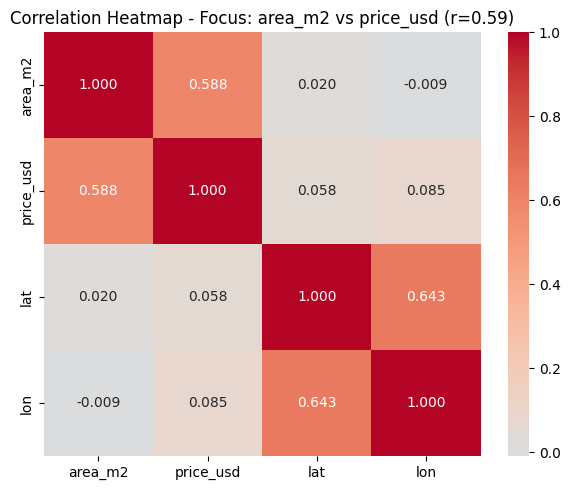

In [42]:
#Vẽ biểu đồ thể hiện sự tương quan dữ liệu giữ area_m2 và price_usd
plt.figure(figsize=(6, 5))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', center=0, fmt='.3f')
plt.title('Correlation Heatmap - Focus: area_m2 vs price_usd (r=0.59)')
plt.tight_layout()
plt.show()

Dựa vào hình vẽ, ta có kết luận 
- area_m2 và price_usd có sự tương quan thuận (Vì giá trị dương)
=> area_m2 tăng thì price_usd tăng theo
Tuy nhiên sự tương quan này tương đối yếu -> không phải area_m2 nào tăng thì price_usd cũng tăng

In [43]:
# Đếm số lượng bản ghi theo từng giá trị của cột
df['state'].value_counts()

state
Minas Gerais          2634
Paraná                2337
Bahia                 1707
Ceará                 1505
Distrito Federal       710
Espírito Santo         536
Goiás                  515
Pará                   261
Paraíba                224
Maranhão                92
Pernambuco              88
Mato Grosso             83
Alagoas                 24
Mato Grosso do Sul      13
Amazonas                 3
Amapá                    1
Name: count, dtype: int64

C:\Users\phuoc\AppData\Local\Temp\ipykernel_34084\3695870051.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, y = 'state', order = df['state'].value_counts().index, palette = 'Greens_r')


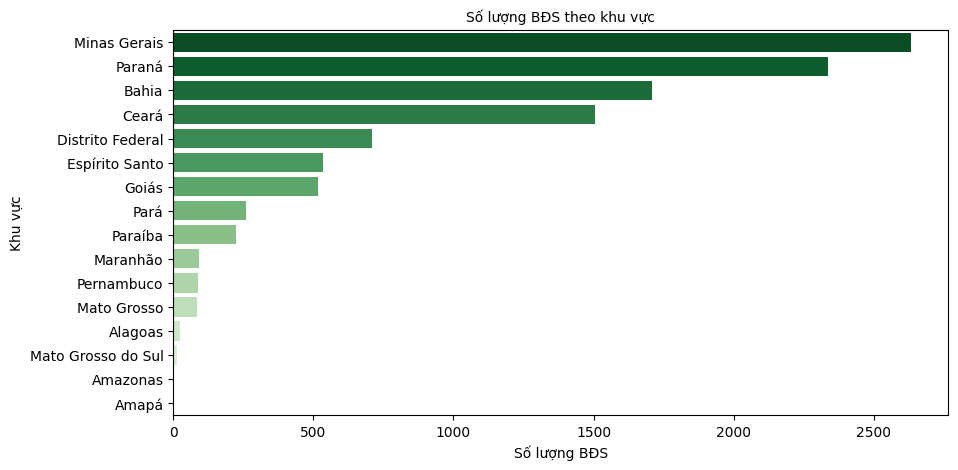

In [ ]:
#Đếm số lượng BĐS theo khu vực
plt.figure(figsize = (10,5))
sns.countplot(data = df, y = 'state', order = df['state'].value_counts().index, palette = 'Greens_r')
plt.title('Số lượng BĐS theo khu vực', fontsize = 10)
plt.xlabel('Số lượng BĐS')
plt.ylabel('Khu vực')
plt.show()